In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

import pathlib
import os
from scipy.stats import pearsonr
import seaborn as sb
from preprocessing_sequencing import preprocess_sequences as ps
from matplotlib import rcParams
import statistics

%matplotlib inline

Input parameters

In [3]:
parameters_path = ("/camp/lab/znamenskiyp/home/shared/projects/turnerb_V1_MAPseq/BRAC8198.6c/Sequencing")
    #"/camp/lab/znamenskiyp/home/shared/projects/turnerb_A1_MAPseq/FIAA45.6a/Sequencing")

In [ ]:
# input here which RT samples are negative controls
# negative_samples = [280, 281, 282, 283]
negative_samples = [178, 179, 180, 181] #for FIAA45.6a


In [13]:
parameters = ps.load_parameters(directory=parameters_path)
sequencing_path = (
    pathlib.Path(parameters["PROCESSED_DIR"])
    / parameters["PROJECT"]
    / parameters["MOUSE"]
    / "Sequencing"
)

In [14]:
negative_samples = parameters['negative_samples']

Run barcode matching job

In [6]:
ps.barcode_matching(
    sorting_directory=str(sequencing_path / "final_processed_sequences"),
    use_slurm=True,
    slurm_folder="/camp/home/turnerb/slurm_logs",
)

'3589536'

In [7]:
barcodes_across_sample = pd.read_pickle(
    str(sequencing_path / "final_processed_sequences/barcodes_across_sample.pkl")
)

Determine cut-oof value ofr total counts of barcode

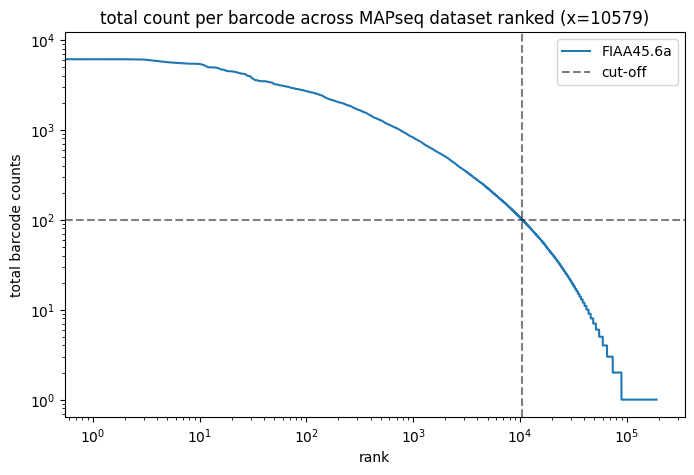

In [8]:
# determine cut-off for total counts for barcode across dataset
max_y = 100
rcParams["figure.figsize"] = 8, 5
interpolate_on_x = len(np.flip(np.sort(barcodes_across_sample.sum(axis=1)))) - len(
    np.flip(np.sort(barcodes_across_sample.sum(axis=1)))[
        np.flip(np.sort(barcodes_across_sample.sum(axis=1))) < max_y
    ]
)
plt.loglog(np.flip(np.sort(barcodes_across_sample.sum(axis=1))), label="FIAA45.6a")
plt.xlabel("rank")
plt.ylabel("total barcode counts")
plt.axhline(y=max_y, linestyle="dashed", color="Black", label="cut-off", alpha=0.5)
plt.axvline(x=interpolate_on_x, linestyle="dashed", color="Black", alpha=0.5)
plt.title(
    f"total count per barcode across MAPseq dataset ranked (x={interpolate_on_x})"
)
plt.legend()

In [9]:
filtered_barcodes = barcodes_across_sample[barcodes_across_sample.sum(axis=1) >= max_y]

In [12]:
filtered_barcodes

,1,2,3,4,5,6,7,8,9,10,...,128,129,130,131,132,133,134,135,136,137
sequence,,,,,,,,,,,,,,,,,,,,,
GCCTTCGTATCCTTCAGAGAAGTGGGGGCGCC,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,10.0,15.0,1.0,7.0,0.0,0.0,0.0,0.0
GCTGGGTCATCAGTGTGGCGTAACGAGAGCTC,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0
AAGAAAGGATGTTATAACTACCGTGACTTTTC,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,4.0,11.0,0.0,4.0,0.0,0.0,0.0,1.0
TCACATAGATGCCTACCGTGTCAATTATTGCT,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,46.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
TGTACAGTATCTAAGGCTTGCTATTCCTGGTT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTGGAAGAATAACTTGTCCAACTGAGCCGGCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CTGTATCTATTATCGCGTCGGCTACCGGTTTT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CTGTCAAAATGCTAGGTAGTGATCTTGGAATT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'barcode umi counts in negative controls \n n = 750')

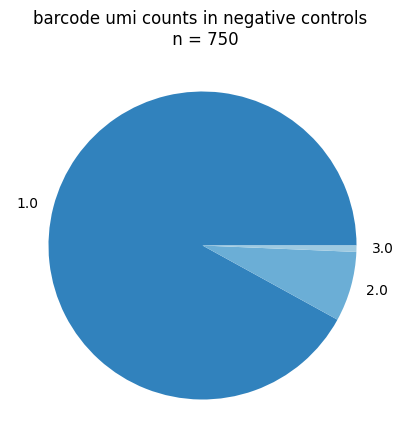

In [15]:
rcParams["figure.figsize"] = 5, 5
cmap = plt.get_cmap("tab20c")

negs = filtered_barcodes[negative_samples].melt(
    var_name="samples", value_name="barcode_counts"
)
colours_picking = sb.color_palette("tab20c")[0:3]
plt.pie(
    negs[negs["barcode_counts"] > 0]["barcode_counts"].value_counts(),
    labels=negs[negs["barcode_counts"] > 0]["barcode_counts"]
    .value_counts()
    .index.values.tolist(),
    colors=colours_picking,
)
plt.title(
    f"barcode umi counts in negative controls \n n = {len(negs[negs.barcode_counts>0])}"
)

In [16]:
filtered_barcodes = filtered_barcodes.replace(1, 0)
filtered_barcodes = filtered_barcodes.replace(2,0)

In [17]:
filtered_barcodes[filtered_barcodes[119] > 0][119]

Series([], Name: 119, dtype: float64)

Text(0.5, 1.0, 'UMI count per barcode across samples')

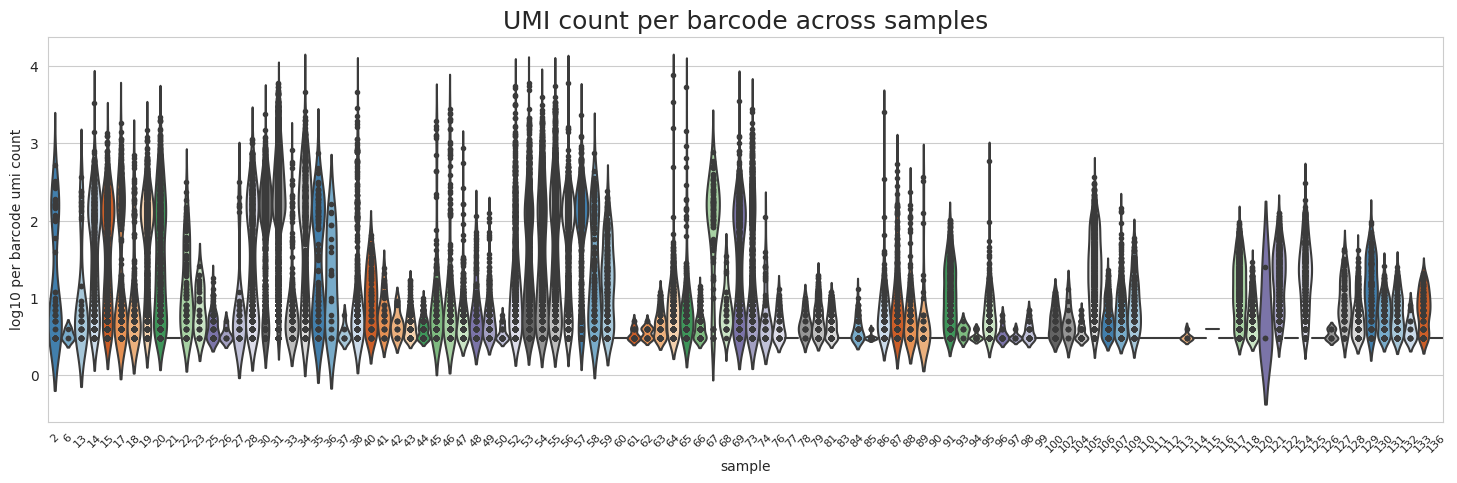

In [18]:
to_plot = filtered_barcodes.melt(var_name="samples", value_name="barcode_counts")
to_plot = to_plot.drop(to_plot[to_plot.barcode_counts < 1].index)
to_plot["log_bc_counts"] = np.log10(to_plot["barcode_counts"])

rcParams["figure.figsize"] = 18, 5


# to_plot = to_plot.drop(to_plot[to_plot.barcode_counts < 2].index)
sb.set_style("whitegrid")
# ax = sb.barplot(x="samples", y="barcode_counts", data=to_plot)
# sb.stripplot(x="samples", y="barcode_counts", data=to_plot, ax=ax, color='black')
sb.violinplot(
    x="samples",
    y="log_bc_counts",
    data=to_plot,
    inner="point",
    scale="width",
    palette="tab20c",
    width=1,
)
# sb.boxplot(x="samples", y="log_bc_counts", data=to_plot)
# sb.stripplot(x="samples", y="log_bc_counts", data=to_plot)
# plt.yscale('log')
plt.xlabel("sample")
plt.ylabel("log10 per barcode umi count")
plt.xticks(rotation=45, fontsize=8)
plt.title("UMI count per barcode across samples", fontsize=18)

Text(0, 0.5, '# reads')

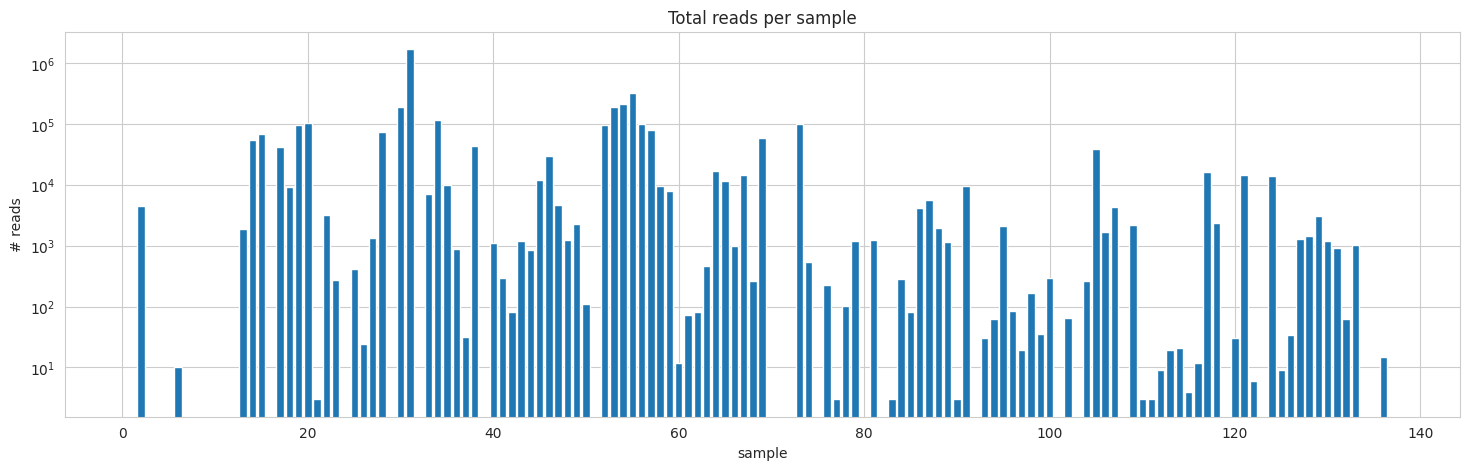

In [19]:
# Look at total reads per sample
plt.bar(filtered_barcodes.columns, filtered_barcodes.sum(axis=0))
plt.yscale("log")
plt.title("Total reads per sample")
plt.xlabel("sample")
plt.ylabel("# reads")

Normalise based on spike-in RNA levels

In [20]:
sorting_dir = sequencing_path / "final_processed_sequences"
# spike-in normalisation, generate table of spike counts per sample
spike_counts = pd.DataFrame(columns=["sample", "spike_count"])
for sample in os.listdir(sorting_dir):
    if sample.startswith("spike_counts"):
        sample_name = sample.split("spike_counts_", 1)
        sample_name = sample_name[1][: -len(".csv")]
        sample_num = float(sample_name[2:])
        sample_reading = pd.read_csv(sorting_dir / sample)
        sample_reading["counts"] = sample_reading["counts"].astype("int")
        sum_counts = sample_reading["counts"].sum()
        new_row = pd.DataFrame(
            {"sample": sample_num, "spike_count": sum_counts}, index=[0]
        )
        spike_counts = pd.concat([spike_counts, new_row])

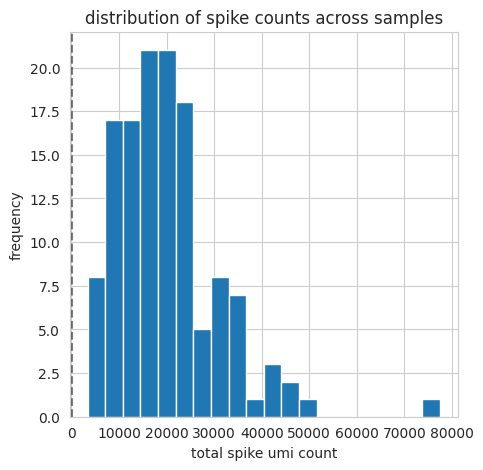

In [21]:
# plot the distribtution of spike-in reads and decide cut-off threshold
rcParams["figure.figsize"] = 5, 5
plt.hist(spike_counts["spike_count"], bins=20)
plt.xlabel("total spike umi count")
plt.ylabel("frequency")
plt.title("distribution of spike counts across samples")
plt.axvline(x=50, color="black", linestyle="dashed", label="cut-off", alpha=0.5)

In [22]:
# remove spikes that are below certain threshold, then normalise total counts in each sample by relative spike-count

spike_cutoff = 10
spike_thresh = list(spike_counts[spike_counts["spike_count"] < spike_cutoff]["sample"])
filtered_barcodes_QC = filtered_barcodes.drop((spike_thresh), axis=1)
spikes_thresholded = spike_counts[spike_counts["spike_count"] > spike_cutoff]

In [23]:
median_spike = statistics.median(spikes_thresholded["spike_count"].to_list())
spikes_thresholded["normalisation_factor"] = (
    spikes_thresholded["spike_count"] / median_spike
)

In [24]:
filtered_barcodes_spike_normalised = filtered_barcodes_QC.copy()
for i, row in spikes_thresholded.iterrows():
    if row["sample"] in filtered_barcodes_spike_normalised.columns:
        filtered_barcodes_spike_normalised[row["sample"]] = (
            filtered_barcodes_spike_normalised[row["sample"]]
            / row["normalisation_factor"]
        )

Text(0.5, 1.0, 'UMI count per barcode across samples after spike normalisation')

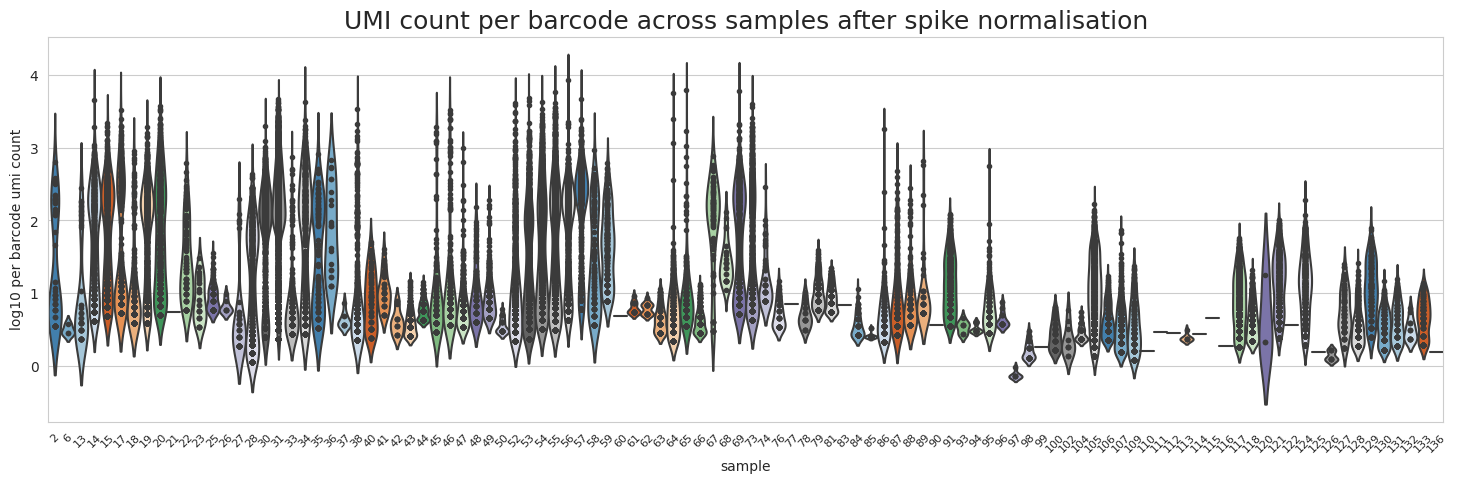

In [25]:
to_plot = filtered_barcodes_spike_normalised.melt(
    var_name="samples", value_name="barcode_counts"
)
to_plot = to_plot.drop(to_plot[to_plot.barcode_counts == 0].index)
to_plot["log_bc_counts"] = np.log10(to_plot["barcode_counts"])

rcParams["figure.figsize"] = 18, 5


# to_plot = to_plot.drop(to_plot[to_plot.barcode_counts < 2].index)
sb.set_style("whitegrid")
# ax = sb.barplot(x="samples", y="barcode_counts", data=to_plot)
# sb.stripplot(x="samples", y="barcode_counts", data=to_plot, ax=ax, color='black')
sb.violinplot(
    x="samples",
    y="log_bc_counts",
    data=to_plot,
    inner="point",
    scale="width",
    palette="tab20c",
    width=1,
)
# sb.boxplot(x="samples", y="log_bc_counts", data=to_plot)
# sb.stripplot(x="samples", y="log_bc_counts", data=to_plot)
# plt.yscale('log')
plt.xlabel("sample")
plt.ylabel("log10 per barcode umi count")
plt.xticks(rotation=45, fontsize=8)
plt.title("UMI count per barcode across samples after spike normalisation", fontsize=18)

In [26]:
spikes_thresholded["normalisation_factor"].max()

4.193206117201245

In [27]:
filtered_barcodes_spike_normalised.to_pickle(
    sequencing_path / "barcode_matrix_normalised.pkl"
)

In [28]:
filtered_barcodes.to_pickle(sequencing_path / "barcode_matrix_no_normalised.pkl")